You are given a positive integer n representing the number of nodes in an undirected graph. The nodes are labeled from 1 to n.

You are also given a 2D integer array edges, where edges[i] = [ai, bi] indicates that there is a bidirectional edge between nodes ai and bi. Notice that the given graph may be disconnected.

Divide the nodes of the graph into m groups (1-indexed) such that:

    Each node in the graph belongs to exactly one group.
    For every pair of nodes in the graph that are connected by an edge [ai, bi], if ai belongs to the group with index x, and bi belongs to the group with index y, then |y - x| = 1.

Return the maximum number of groups (i.e., maximum m) into which you can divide the nodes. Return -1 if it is impossible to group the nodes with the given conditions.

 

Example 1:

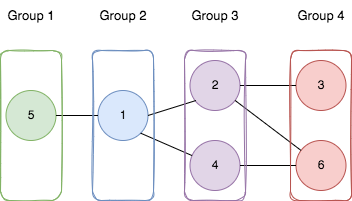

Input: n = 6, edges = [[1,2],[1,4],[1,5],[2,6],[2,3],[4,6]]
Output: 4
Explanation: As shown in the image we:
- Add node 5 to the first group.
- Add node 1 to the second group.
- Add nodes 2 and 4 to the third group.
- Add nodes 3 and 6 to the fourth group.
We can see that every edge is satisfied.
It can be shown that that if we create a fifth group and move any node from the third or fourth group to it, at least on of the edges will not be satisfied.

Example 2:

Input: n = 3, edges = [[1,2],[2,3],[3,1]]
Output: -1
Explanation: If we add node 1 to the first group, node 2 to the second group, and node 3 to the third group to satisfy the first two edges, we can see that the third edge will not be satisfied.
It can be shown that no grouping is possible.

 

Constraints:

    1 <= n <= 500
    1 <= edges.length <= 104
    edges[i].length == 2
    1 <= ai, bi <= n
    ai != bi
    There is at most one edge between any pair of vertices.



In [ ]:
class Solution:
    def magnificentSets(self, n: int, edges: List[List[int]]) -> int:
        # Create adjacency list for the graph
        adj_list = [[] for _ in range(n)]
        for edge in edges:
            # Transition to 0-index
            adj_list[edge[0] - 1].append(edge[1] - 1)
            adj_list[edge[1] - 1].append(edge[0] - 1)

        # Initialize color array to -1
        colors = [-1] * n

        # Check if the graph is bipartite
        for node in range(n):
            if colors[node] != -1:
                continue
            # Start coloring from uncolored nodes
            colors[node] = 0
            if not self._is_bipartite(adj_list, node, colors):
                return -1

        # Calculate the longest shortest path for each node
        distances = [
            self._get_longest_shortest_path(adj_list, node, n)
            for node in range(n)
        ]

        # Calculate the total maximum number of groups across all components
        max_number_of_groups = 0
        visited = [False] * n
        for node in range(n):
            if visited[node]:
                continue
            # Add the number of groups for this component to the total
            max_number_of_groups += self._get_number_of_groups_for_component(
                adj_list, node, distances, visited
            )

        return max_number_of_groups

    # Checks if the graph is bipartite starting from the given node
    def _is_bipartite(self, adj_list, node, colors):
        for neighbor in adj_list[node]:
            # If a neighbor has the same color as the current node, the graph is not bipartite
            if colors[neighbor] == colors[node]:
                return False
            # If the neighbor is already colored, skip it
            if colors[neighbor] != -1:
                continue
            # Assign the opposite color to the neighbor
            colors[neighbor] = (colors[node] + 1) % 2
            # Recursively check bipartiteness for the neighbor; return false if it fails
            if not self._is_bipartite(adj_list, neighbor, colors):
                return False
        # If all neighbors are properly colored, return true
        return True

    # Computes the longest shortest path (height) in the graph starting from the source node
    def _get_longest_shortest_path(self, adj_list, src_node, n):
        # Initialize a queue for BFS and a visited array
        nodes_queue = deque([src_node])
        visited = [False] * n
        visited[src_node] = True
        distance = 0

        # Perform BFS layer by layer
        while nodes_queue:
            # Process all nodes in the current layer
            for _ in range(len(nodes_queue)):
                current_node = nodes_queue.popleft()
                # Visit all unvisited neighbors of the current node
                for neighbor in adj_list[current_node]:
                    if visited[neighbor]:
                        continue
                    visited[neighbor] = True
                    nodes_queue.append(neighbor)
            # Increment the distance for each layer
            distance += 1

        # Return the total distance (longest shortest path)
        return distance

    # Calculates the maximum number of groups for a connected component
    def _get_number_of_groups_for_component(
        self, adj_list, node, distances, visited
    ):
        # Start with the distance of the current node as the maximum
        max_number_of_groups = distances[node]
        visited[node] = True

        # Recursively calculate the maximum for all unvisited neighbors
        for neighbor in adj_list[node]:
            if visited[neighbor]:
                continue
            max_number_of_groups = max(
                max_number_of_groups,
                self._get_number_of_groups_for_component(
                    adj_list, neighbor, distances, visited
                ),
            )
        return max_number_of_groups